# Практика по спектроскопии 

## Введение

На этой практике вам предстоит детектировать разные газы в атмосфере Марса. Спектроскопия &mdash; один из стандартных для этого методов. Достоинство спектроскопии заключается в том, что она позволяет дистанционно измерять присутствие и характеристики разных газов в атмосфере Марса. Часто помимо использования спектроскопии это требует применения [сложных методов обработки данных](https://ru.wikipedia.org/wiki/%D0%9E%D0%B1%D1%80%D0%B0%D1%82%D0%BD%D0%B0%D1%8F_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B0). Мы же будем использовать более простую формулировку задачи для таких *[in situ](https://en.wikipedia.org/wiki/In_situ)* экспериментов как роверы. В подобных случаях часто используют специальное хранилище газа &mdash; кювету, нагнетают туда газ из атмосферы под большим давлением и измереяют его спектр поглощения. 
\
\
Схема нашего эксперимента выглядит так: 
![Схема](scheme.png)

Поглощение света рассчитывается по [формуле Бугера-Лаберта-Бера](https://ru.wikipedia.org/wiki/%D0%97%D0%B0%D0%BA%D0%BE%D0%BD_%D0%91%D1%83%D0%B3%D0%B5%D1%80%D0%B0_%E2%80%94_%D0%9B%D0%B0%D0%BC%D0%B1%D0%B5%D1%80%D1%82%D0%B0_%E2%80%94_%D0%91%D0%B5%D1%80%D0%B0): 
$$
\Large\ T = e^{-k n l}
$$
Где $T$ &mdash; пропускание газа, то есть доля света, проходящего через среду. Значение пропускания, равное **1**, означает, что свет на этой длине волны проходит полностью и не поглощается молекулами газа. Значение **0** значит, что весь свет поглотился и через газ не прошло ни одного фотона света. $l$ &mdash; оптический путь, который проходит свет сквозь среду. В нашем случае свет много раз отражается в зеркалах кюветы и проходит путь, гораздо больший чем длина кюветы. $n$ &mdash; относительное содержание газа (в долях от единицы), а $k$ &mdash; коэффициент поглощения. Коэффициент поглощения &mdash; это величина, которая пропорциональна поглощению отдельными молекулами газа, и зависит от температуры, давления и других параметров вещества. **В вашем распряжении будут данные, которые очень близки к реальным спектрам с Марса, и сечения поглощения каждого газа. Вам нужно будет подобрать концетрацию этих газов так, чтобы они вместе описывали конкретный спектр.**
\
\
Как и на всех других практиках, вокруг вас находятся волонтеры &mdash; люди, готовые ответить на любой ваш вопрос. **Пожалуйста, не стесняйтесь спрашивать их вопросы по заданию!** 

## Часть первая: спектр около места посадки Mars2020
### Загрузка данных

Мы сгенерировали для вас спектры, которые могли бы быть измерены в районе посадки трех марсоходов: _Сuriosity_, _Mars 2020_ (_Perseverance_) и _Zhurong_. Далее мы попробуем выяснить, сколько в каждом из спектров различных газов.
\
\
Для загрузки данных будем использовать функцию `load_data` из модуля `lksh`:

In [1]:
from lksh import load_data

Теперь загрузим данные для вашего первого задания и запишем их в переменные `wavelength` и `t`:

In [2]:
wavelength, t = load_data('data/Mars2020/spectrum.txt')

Давайте посмотрим, как выглядят эти данные. Не забудем импортировать нужную функцию:

In [3]:
from lksh import plot

И построим график:

In [ ]:
plot(x, y) # вместо x и y впишите нужные переменные которые мы загрузили выше

Напомним, что при рисовании графика очень важно указывать, что отображено по осям. Вы можете посмотреть описание данных, открыв файл в приложении "Блокнот". Впишите в кавычках то, что указано по оси x и по оси y:

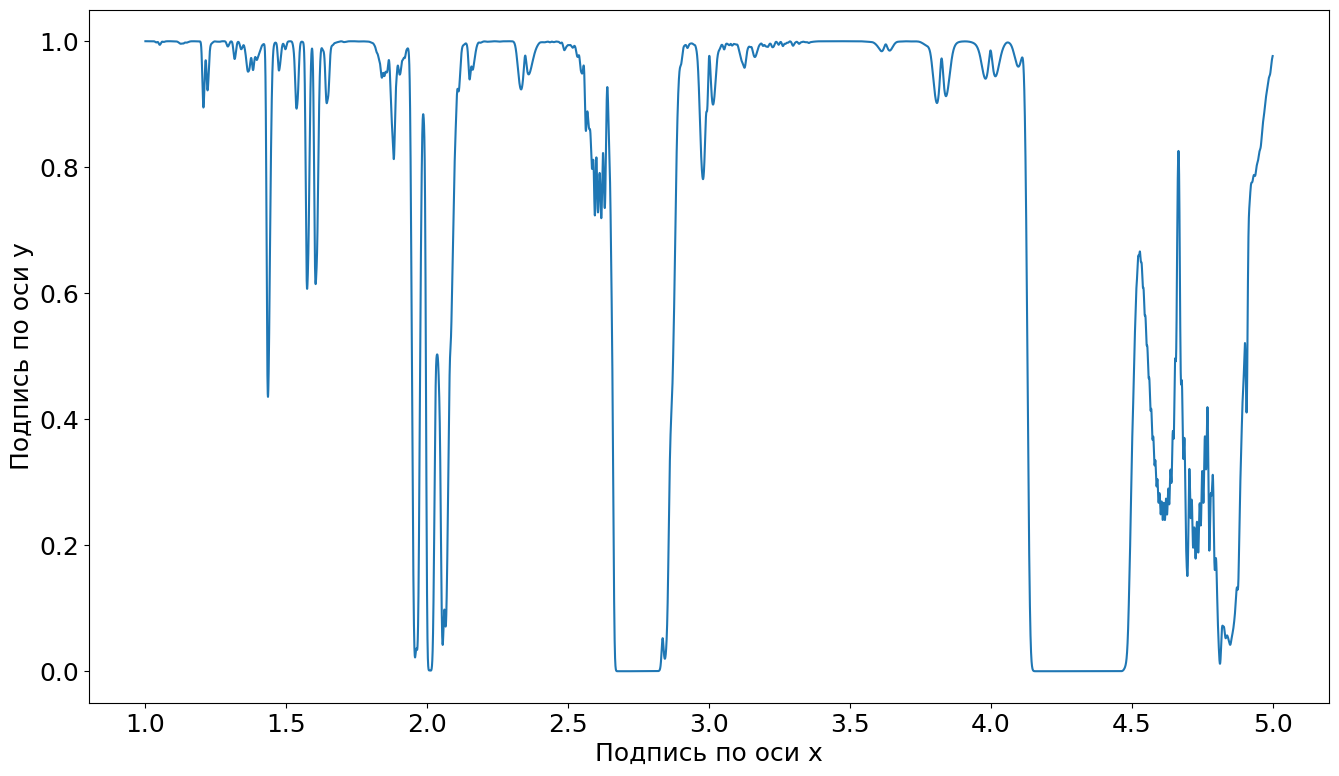

In [5]:
plot(x, y, xlabel='Подпись по оси x', ylabel='Подпись по оси y') # Замените фразы в кавычках на 
                                                                 # описание из файла

## Моделирование пропускания
В модуле `lksh` есть функция `transmission`, которая позволяет моделировать пропускание атмосферы в заданной локации. Давайте посмотрим, как она работает:

In [6]:
from lksh import transmission

В качестве первого аргумента необходимо указать локацию (`Сuriosity`, `Mars2020` или `Zhurong`), остальные же аргументы отвечают за массовую долю компонентов Марсианской атмоферы. По умолчанию `CO2=0.96`, что соответствует 96 процентам CO$_2$ в Марсианской атмосфере, а `H2O=0.001`, то есть 0.1% водяного пара. Остальные газы: `CH4` , `CO`, `HDO`, `HCl`, `O2`, `O3` приняты равными нулю:

In [7]:
wavelength_model, model = transmission('Mars2020')

Посмотрим, насколько точно наша модель, в которой учитывается только CO$_2$ и H$_2$О, описывает Марсианскую атмосферу: 

In [ ]:
wavelength_model, model = transmission('Mars2020', CO2=0.96, H2O=0.001)

plot(wavelength, t, xlabel='Длина волны', ylabel='Пропускание') # подпишите графики, 
                                                                # вписав подходящее описание в label
plot(wavelength_model, model)

- Хорошо ли совпадают графики? 
- Подберите значения концентраций `CO2`, `H2O` и `CO` в данных так, чтобы они совпадали с данными.

In [ ]:
wavelength_model, model = transmission('Mars2020', CO2=0.96,  # впишите после пустых знаков "равно"
                                        H2O=, CO=)            # значения концентрации

In [ ]:
plot(wavelength, t, xlabel='', ylabel='', label='')
plot(wavelength_model, model, label='')

## Часть вторая: место посадки Curiosity

Ровер Curiosity находится в кратере Гейла на Марса. Несколько раз он детектировал метан с помощью прибора TLS. Эти и другие детектирования находятся на пределе возможностей прибора, и _не подтверждены_ более мощными приборами, которые измеряют метан в средней и верхней атмосфере. Одна из гипотез заключается в том, что источник метана находится где-то около поверхности, а его появление носит сезонный характер. Представим себе, что наш прибор проводит измерения именно в момент хорошего содержания метана.

In [ ]:
wavelength, t = load_data('data/Curiosity/spectrum.txt')

Возможно, вам будет удобнее выделить полосу поглощения метана на графике и работать только с ней. Для этого можно использовать функции `xlim` и `ylim`:

In [ ]:
from lksh import xlim, ylim

Найдите в модели полосу метана задав большие значения концентрации, а потом попробуйте выделить ее с помощью функций `xlim` и `ylim`:

In [ ]:
wavelength_model, model = transmission('Curiosity', CO2=0.96,   # впишите после пустых знаков "равно"
                                        CH4=)                   # значения концентрации

# xlim(минимум, максимум) # замените минимум и максимум на границы полосы метана
# ylim(минимум, максимум) # можно ограничить и значения по y чтобы приблизить данные

- Попробуйте найти метан и определить его концетрацию в данных с места посадки Curiosity
> Постепенно уменьшайте содержание метана. Помните, что даже если мы найдем *очень малые* концетрации метана, это будет большое открытие! Как вы думаете, какая концентрация может иметь значение для исследования Марса?

In [ ]:
# Ваш код

- ✨ **Дополнительное задание**: попробуйте найти концетрации других малых газов в этом и предыдущем спектрах.  

In [ ]:
# Ваш код

## Часть третья: место посадки Zhurong и спектры высокого разрешения

До этого мы использовали данные низкого разрешения. Такие спектры более наглядные, однако, работая с более высоким разрешением, можно детектировать гораздо меньшие доли компонентов. 
- Попробуйте поменять значение параметра `r`, который отвечает за разрешение спектрометра. Подставьте значения `1000` (стандартное), `5000`, `10000` и `20000`.

In [ ]:
wavelength_model, model = transmission('Zhurong', CO2=0.96,   # впишите после пустых знаков "равно"
                                        r=)                   # значение r

In [ ]:
plot(wavelength_model, model, xlabel='', ylabel='') # посмотрите как выглядят разные газы
                                                    # в высоком спектральном разрешении

Теперь попробуем поработать со спектром высокого разрешения и восстановим значение водяного пара (`H2O`) из данных.
- Определите концетрацию водяного пара из данных в файле `data/Zhurong/spectrum.txt`. В этих данных `r=10000`

In [ ]:
# загрузите данные используя функцию load_data

In [ ]:
# используя функцию transmission задайте r=10000 и подберите концетрацию озона

- ✨ **Дополнительное задание**: попробуйте найти концетрации других малых газов в этом спектре.

In [ ]:
# Ваш код